In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from data_utils import (
    load_pos_mat, 
    compute_smoothed_speed, 
    compute_smoothed_movement_direction, 
)

%matplotlib inline  
%load_ext autoreload 
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
pos_mat_logdir = "positionalDataByTrialType.mat"
d_pos = load_pos_mat(pos_mat_logdir)

In [35]:
raw_freq = 30000

pos = d_pos["data"]["hComb"]["dlc_XYsmooth"]
samples = d_pos["data"]["hComb"]["sample"]  # in sampling frequency
ts = d_pos["data"]["hComb"]["ts"] # in ms
hd = d_pos["data"]["hComb"]["dlc_angle"] # in degrees

smooth_window = 20 # roughly 500-600 ms
md = [
    compute_smoothed_movement_direction(pos[i], samples[i], raw_freq, smooth_window)
    for i in range(len(pos))
]
speed = [
    compute_smoothed_speed(pos[i], samples[i], raw_freq, smooth_window)
    for i in range(len(pos))
]

num_trials = len(pos)

goal_location = d_pos["goalPosition"][0][0][0]
frame_size = d_pos["frameSize"]

print(num_trials)

26


In [36]:
frame_size

array([492, 418], dtype=uint16)

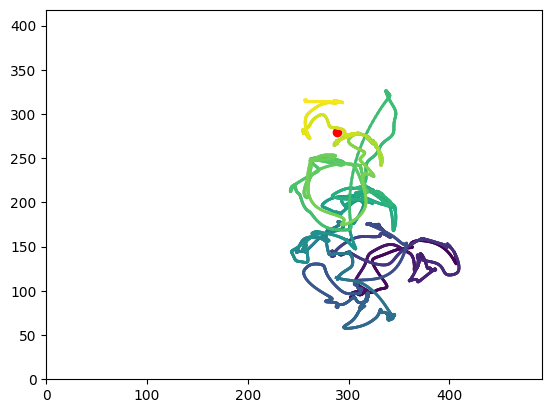

In [42]:
trial = 1
colors = cm.viridis(np.linspace(0, 1, len(pos[trial])))

# Plot the trajectory with heatmap colors
for i in range(len(pos[trial]) - 1):
    plt.plot(pos[trial][i:i+2, 0], pos[trial][i:i+2, 1], color=colors[i], linewidth=2)
plt.scatter(goal_location[0], goal_location[1], color='red', label="Goal Location")
plt.xlim(0, frame_size[0])
plt.ylim(0, frame_size[1])
plt.show()